# Proyek Analisis Data: [Bike-Sharing-Dataset]
- **Nama:** [Rafly Ashraffi Rachmat]
- **Email:** [raflypriyantoro@gmail.com]
- **ID Dicoding:** [MC796D5Y0101]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda sewaan per jam dalam sehari? (Pertanyaan 1)
2. Bagaimana tren penggunaan sepeda sewaan dari hari ke hari? (Pertanyaan 2)
3. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda? (Pertanyaan 3)
4. Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan? (Pertanyaan 4)
5. Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda? (Pertanyaan 5)
6. Pada bulan apa saja terjadi puncak dan penurunan signifikan dalam penyewaan sepeda? (Pertanyaan 6)
7. Bagaimana hubungan antara suhu, kelembaban, dan jumlah penyewaan sepeda? (Pertanyaan 7)
8. Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur? (Pertanyaan 8)
9. Bagaimana tren penggunaan sepeda berubah dari tahun ke tahun? (Pertanyaan 9)
10. Bagaimana perbedaan pola penggunaan sepeda antara penyewa biasa (casual) dan penyewa terdaftar (registered)? (Pertanyaan 10)

## Import Semua Packages/Library yang Digunakan

In [1279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Data Wrangling

In [1282]:
# Membaca data dari file CSV
hour_df = pd.read_csv('data/hour.csv')
day_df = pd.read_csv('data/day.csv')

# Menampilkan beberapa baris pertama dari setiap DataFrame
print("DataFrame hour.csv:")
print(hour_df.head())

print("\nDataFrame day.csv:")
print(day_df.head())

DataFrame hour.csv:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

DataFrame day.csv:
   instant      dteday  season  yr  mnth  holiday  weekday 

### Gathering Data

In [1284]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [1285]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Penjelasan dari data yang diperoleh**

In [1287]:
print(f"day_df memiliki jumlah baris {day_df.shape} kolom")
print(f"hour_df memiliki jumlah baris {hour_df.shape} kolom")

day_df memiliki jumlah baris (731, 16) kolom
hour_df memiliki jumlah baris (17379, 17) kolom


### Assessing Data

- Menilai Struktur Dasar

In [1292]:
print("\nInformasi DataFrame hour.csv:")
print(hour_df.info())

print("\nInformasi DataFrame day.csv:")
print(day_df.info())


Informasi DataFrame hour.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Informasi Da

**Insight :**
- Kolom waktu: dteday (tanggal), mnth (bulan), yr (tahun), weekday (hari dalam seminggu), hr (jam, hanya di hour.csv).
- Kondisi eksternal: season (musim), weathersit (kondisi cuaca), temp (suhu), atemp (suhu terasa), hum (kelembaban), windspeed (kecepatan angin).
- Hari kerja dan libur: holiday (hari libur atau tidak), workingday (hari kerja atau akhir pekan/libur).
- Pengguna sepeda: casual (pengguna biasa), registered (pengguna terdaftar), cnt (total pengguna).

- Statistik Deskriptif

In [1297]:
print("\nStatistik deskriptif DataFrame hour.csv:")
print(hour_df.describe())

print("\nStatistik deskriptif DataFrame day.csv:")
print(day_df.describe())


Statistik deskriptif DataFrame hour.csv:
          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.

**Insight :**
1. **Dataset hour.csv (Data Per Jam)**
- Jumlah penyewaan (cnt) berkisar antara 1 hingga 977 sepeda per jam.
- Rata-rata jumlah penyewaan sepeda per jam adalah 189.
- Jumlah pengguna terdaftar (registered) jauh lebih tinggi daripada pengguna kasual (casual).
2. **Dataset day.csv (Data Per Hari)**
- Jumlah penyewaan (cnt) per hari berkisar antara 22 hingga 8.714 sepeda.
- Rata-rata jumlah penyewaan per hari adalah 4.504 sepeda.
- Pengguna terdaftar (registered) juga mendominasi dibandingkan pengguna kasual (casual).

- Mencari Nilai Unik dan Hilang

In [1301]:
print("\nNilai unik untuk setiap kolom di hour.csv:")
for col in hour_df.columns:
    print(f"{col}: {hour_df[col].nunique()}")

print("\nNilai unik untuk setiap kolom di day.csv:")
for col in day_df.columns:
    print(f"{col}: {day_df[col].nunique()}")

print("\nJumlah nilai hilang di hour.csv:")
print(hour_df.isnull().sum())

print("\nJumlah nilai hilang di day.csv:")
print(day_df.isnull().sum())


Nilai unik untuk setiap kolom di hour.csv:
instant: 17379
dteday: 731
season: 4
yr: 2
mnth: 12
hr: 24
holiday: 2
weekday: 7
workingday: 2
weathersit: 4
temp: 50
atemp: 65
hum: 89
windspeed: 30
casual: 322
registered: 776
cnt: 869

Nilai unik untuk setiap kolom di day.csv:
instant: 731
dteday: 731
season: 4
yr: 2
mnth: 12
holiday: 2
weekday: 7
workingday: 2
weathersit: 3
temp: 499
atemp: 690
hum: 595
windspeed: 650
casual: 606
registered: 679
cnt: 696

Jumlah nilai hilang di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah nilai hilang di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0


**Insight :**
- Dataset hour.csv memiliki 24 nilai unik untuk kolom hr, yang menunjukkan bahwa data dikumpulkan setiap jam dalam sehari.
- Dataset day.csv memiliki 731 nilai unik untuk kolom dteday, yang berarti setiap hari dalam dataset memiliki data unik.
- Variabel kategori seperti season, weathersit, dan weekday memiliki jumlah nilai unik yang sesuai dengan rentangnya (misalnya, season memiliki 4 musim, weathersit memiliki 3–4 kategori cuaca).

### Cleaning Data

- Mengubah Tipe Data

In [1306]:
# Mengubah tipe data dteday menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengubah tipe data kolom kategori
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit']
for col in categorical_cols:
    if col in hour_df.columns:
        hour_df[col] = hour_df[col].astype('category')
    if col in day_df.columns:
        day_df[col] = day_df[col].astype('category')

print("\nInformasi DataFrame hour.csv setelah perubahan tipe data:")
print(hour_df.info())

print("\nInformasi DataFrame day.csv setelah perubahan tipe data:")
print(day_df.info())


Informasi DataFrame hour.csv setelah perubahan tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered 

**Insight :**
- Dataset lebih ringan (hour.csv: 1.6 MB, day.csv: 67.7 KB) setelah konversi ke category.
- Kolom dteday sudah dalam format datetime64, siap untuk analisis tren musiman & harian.
- Tidak ada nilai hilang, langsung bisa dieksplorasi & dimodelkan.

- Menambakan Kolom Baru

In [1310]:
hour_df['day_name'] = hour_df['dteday'].dt.day_name()
day_df['day_name'] = day_df['dteday'].dt.day_name()

print(hour_df[['dteday', 'day_name']].head())
print(day_df[['dteday', 'day_name']].head())

      dteday  day_name
0 2011-01-01  Saturday
1 2011-01-01  Saturday
2 2011-01-01  Saturday
3 2011-01-01  Saturday
4 2011-01-01  Saturday
      dteday   day_name
0 2011-01-01   Saturday
1 2011-01-02     Sunday
2 2011-01-03     Monday
3 2011-01-04    Tuesday
4 2011-01-05  Wednesday


**Insight :**
- Bisa analisis pola penyewaan berdasarkan Senin-Minggu.
- Bisa melihat hari dengan penyewaan tertinggi/rendah.

## Exploratory Data Analysis

#### Eksplorasi Univariat

- Distribusi Variabel Numerik

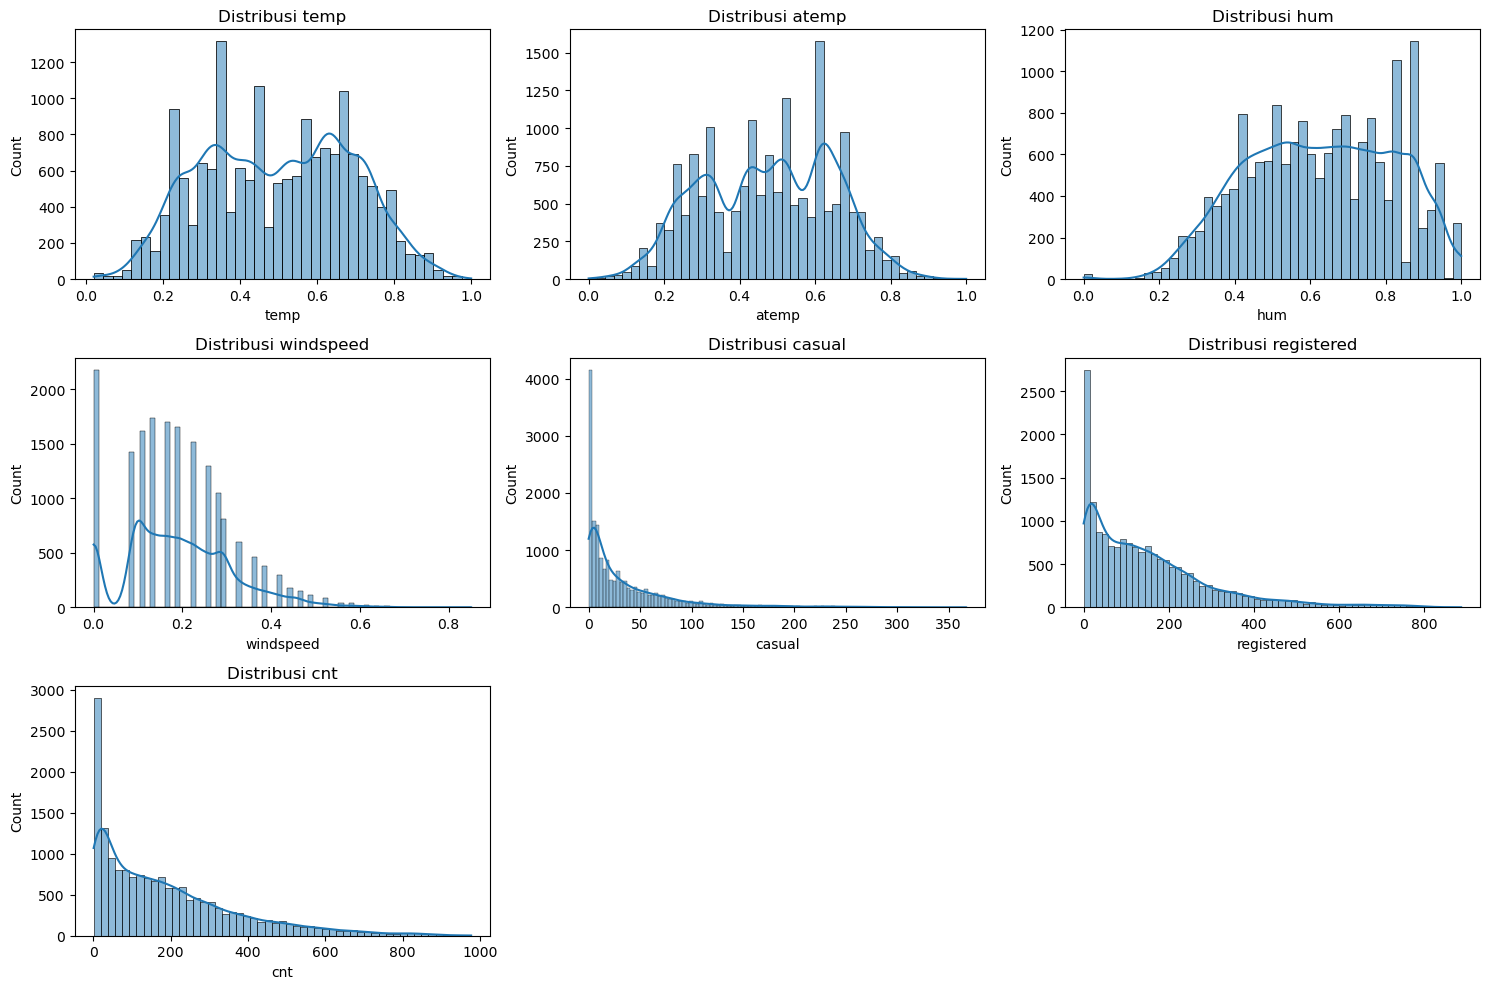

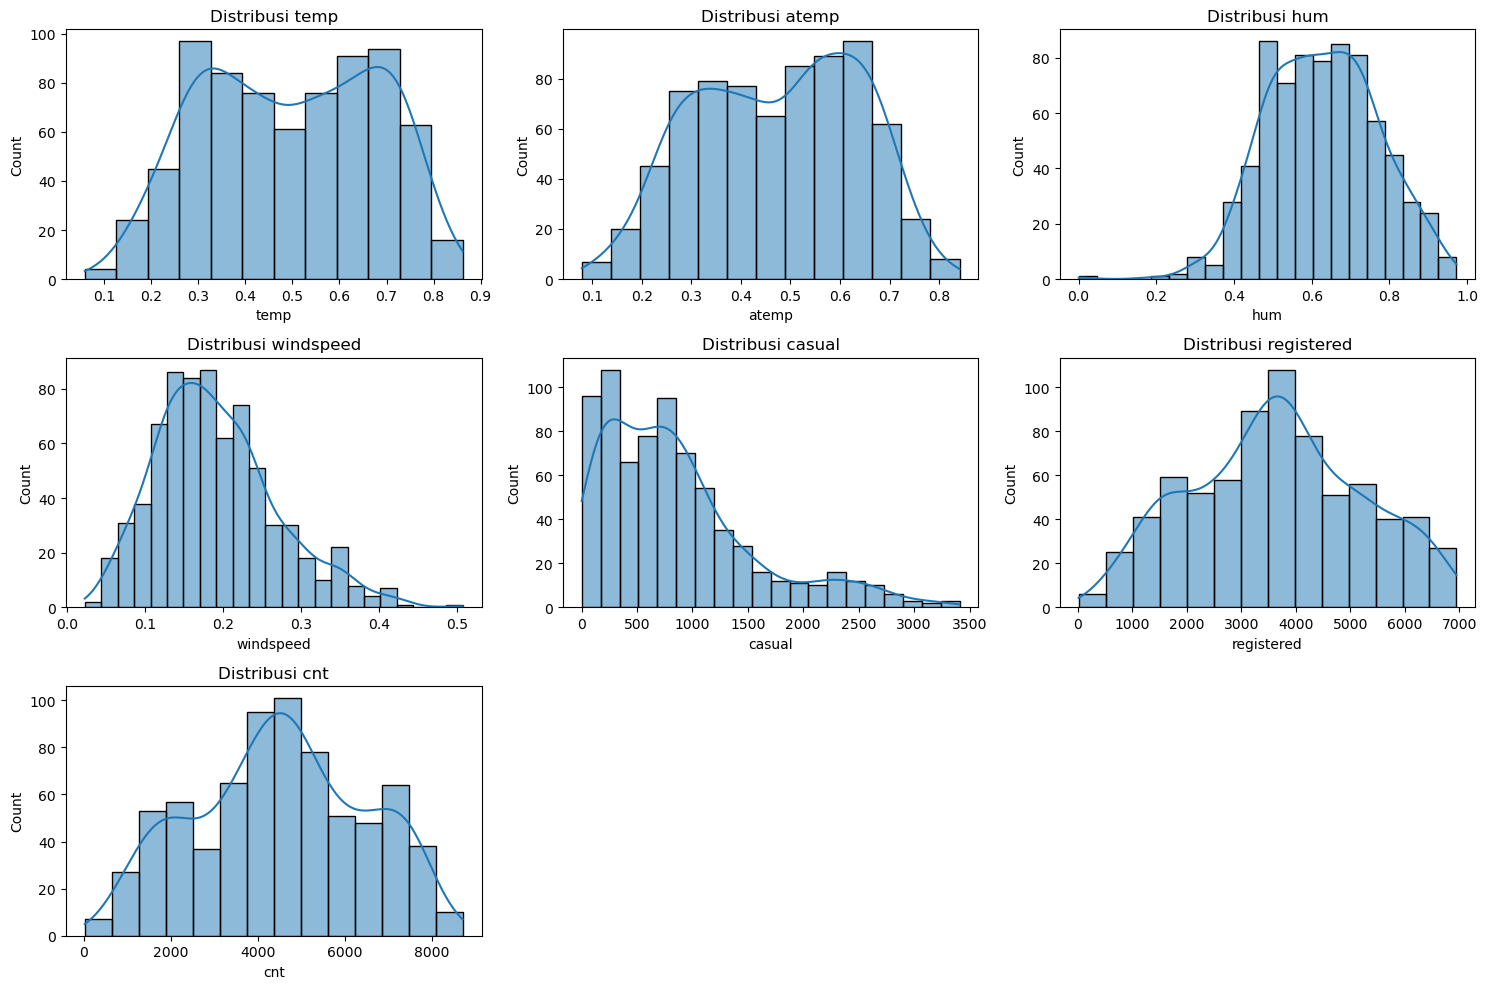

In [1316]:
# Distribusi variabel numerik di hour_df
numerical_cols_hour = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_hour):
    plt.subplot(3, 3, i + 1)
    sns.histplot(hour_df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Distribusi variabel numerik di day_df
numerical_cols_day = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_day):
    plt.subplot(3, 3, i + 1)
    sns.histplot(day_df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

**Insight :**
- Distribusi temp, atemp, hum, dan windspeed → Mayoritas data terkonsentrasi pada rentang tertentu, menunjukkan pola yang stabil.
-  Distribusi casual vs registered → Pengguna terdaftar (registered) jauh lebih dominan dibanding pengguna biasa (casual).
-  Distribusi cnt (total penyewaan) → Terlihat skewed (condong ke kanan), menunjukkan lebih banyak jam/hari dengan penyewaan rendah daripada tinggi.

- Distribusi Variabel Kategorik

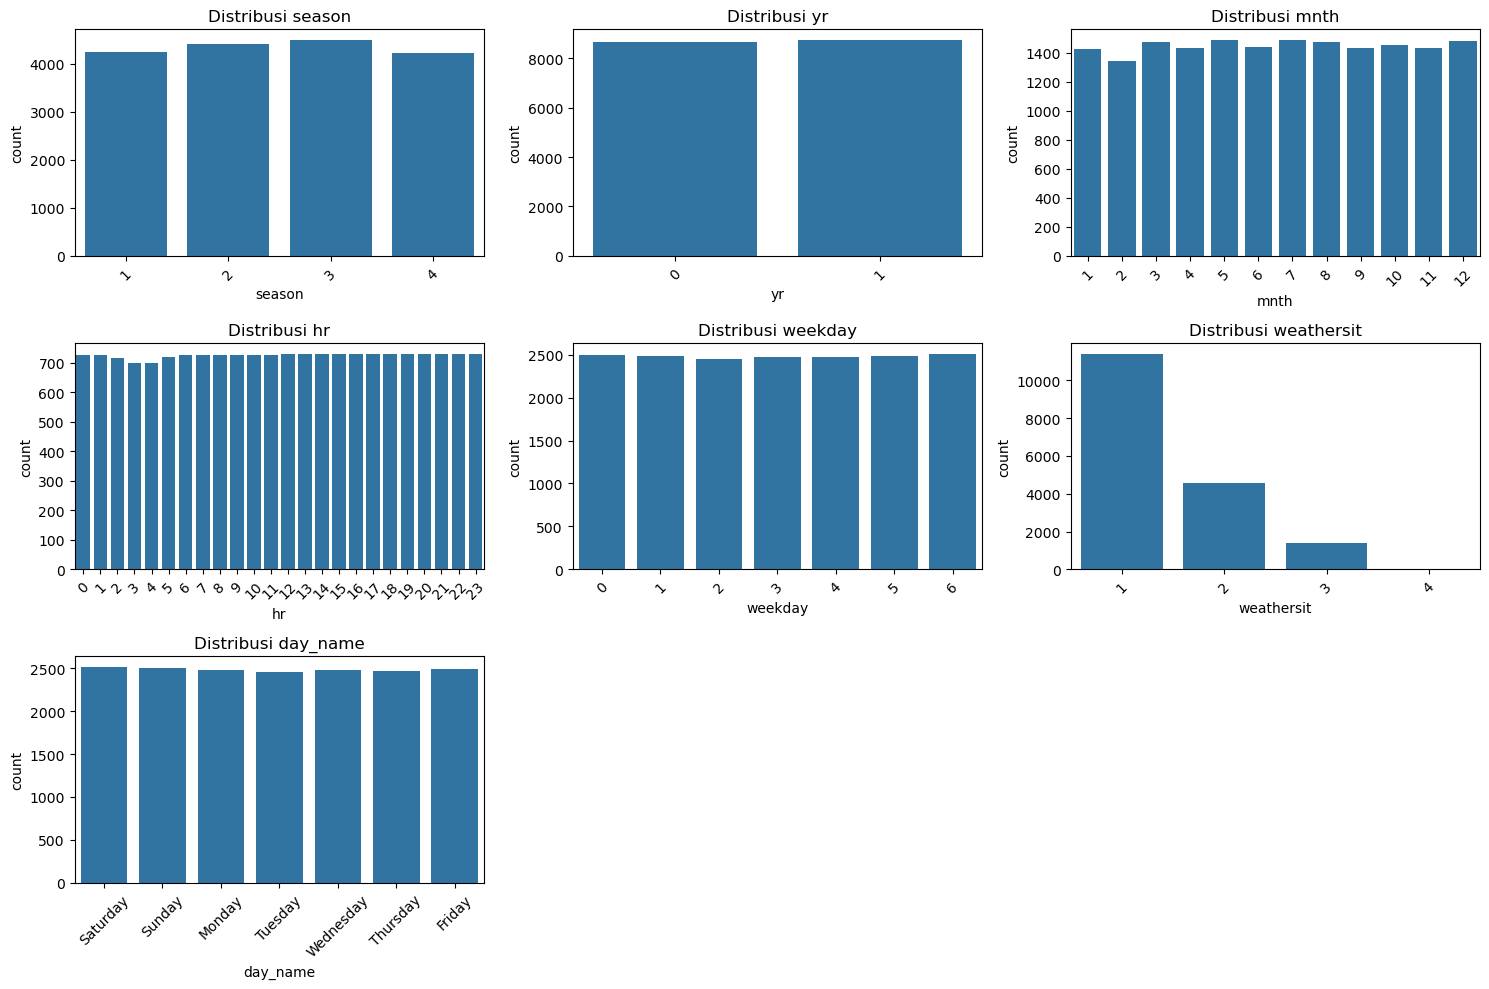

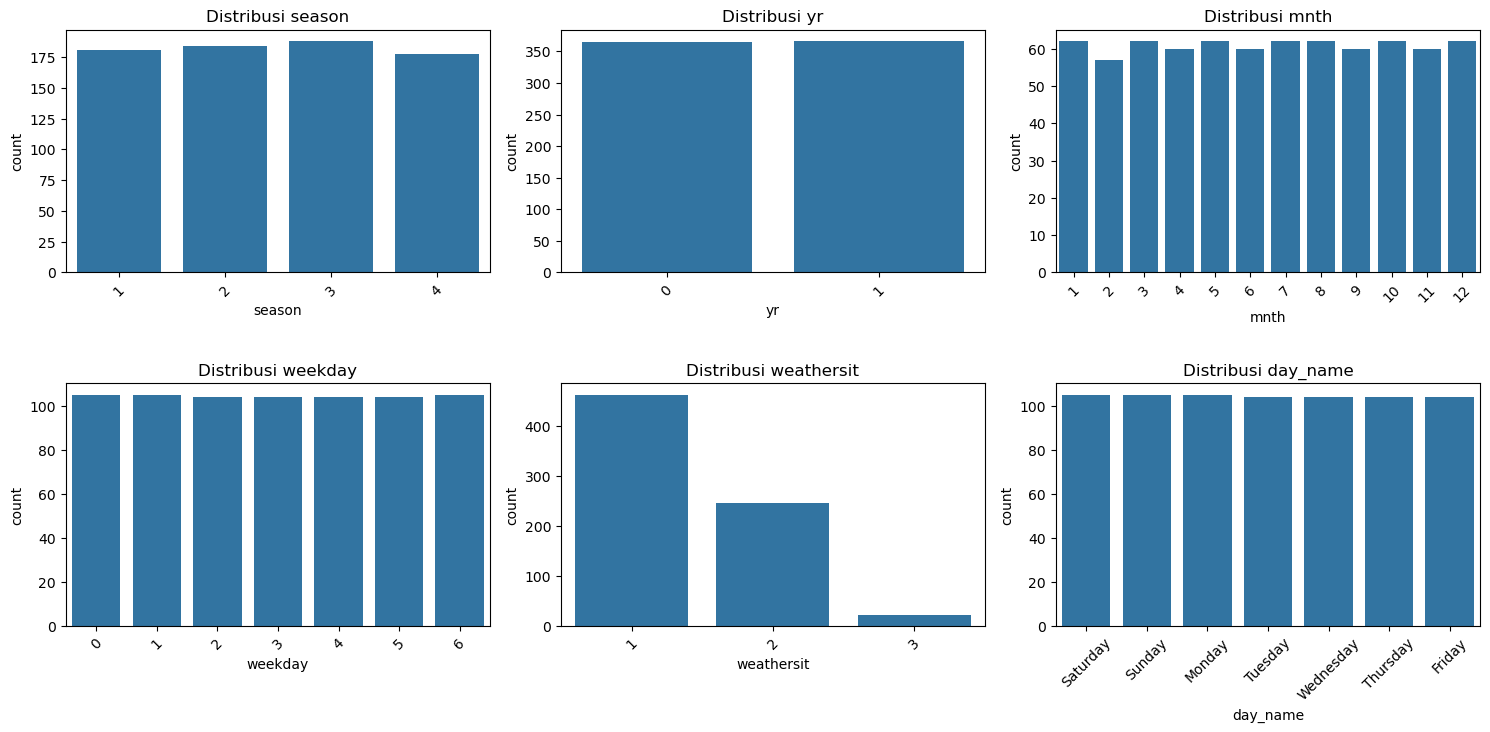

In [1320]:
# Distribusi variabel kategorik di hour_df
categorical_cols_hour = ['season', 'yr', 'mnth', 'hr', 'weekday', 'weathersit', 'day_name']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols_hour):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=hour_df[col])
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribusi variabel kategorik di day_df
categorical_cols_day = ['season', 'yr', 'mnth', 'weekday', 'weathersit', 'day_name']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols_day):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=day_df[col])
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight :**
- Distribusi season & weathersit cukup merata → Penyewaan terjadi di semua musim & kondisi cuaca.
- yr menunjukkan peningkatan penyewaan → Indikasi tren naik dari tahun ke tahun.
- Distribusi mnth, weekday, & day_name → Bisa membantu melihat pola musiman & harian.
- Distribusi hr (di hour_df) menunjukkan jam sibuk → Ada pola jam tertentu dengan penyewaan tinggi.

#### Eksplorasi Bivariat

- Korelasi Antar Variabel Numerik

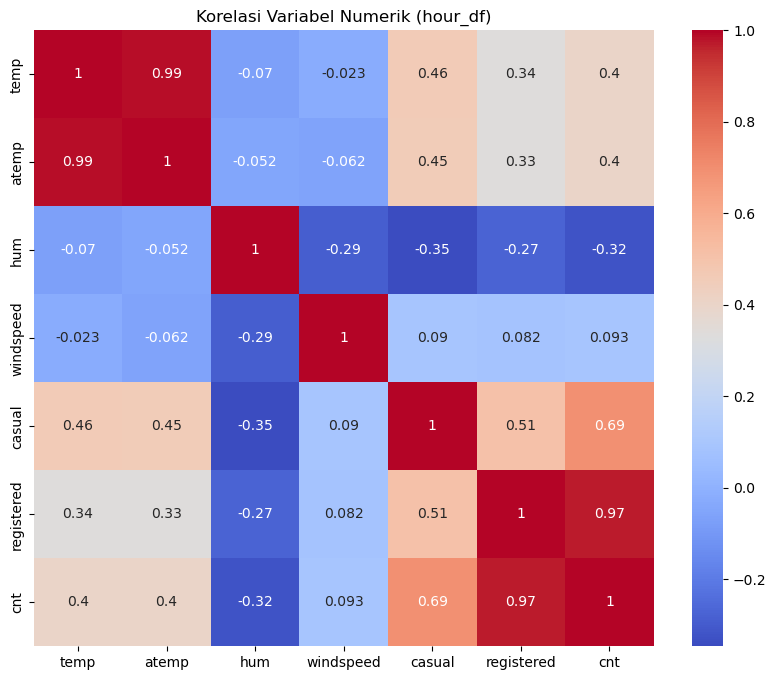

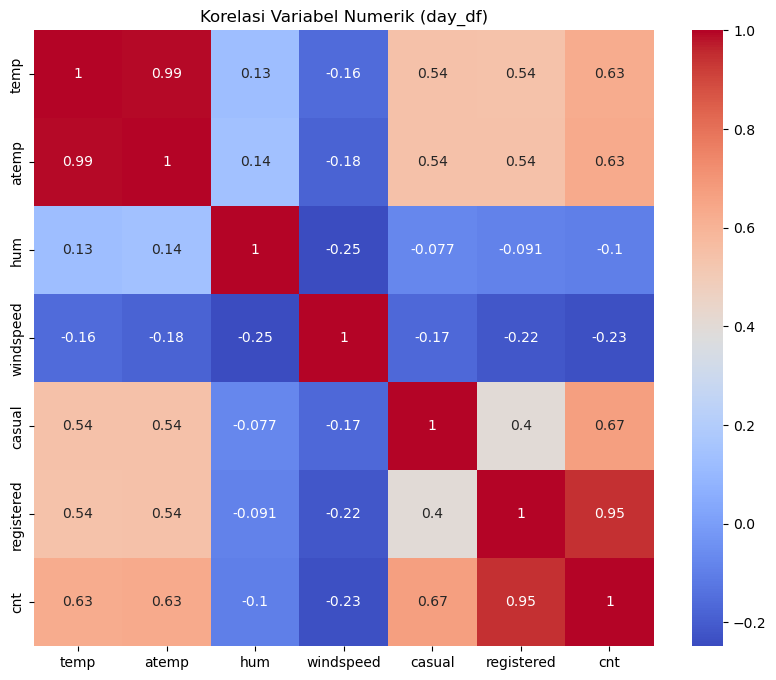

In [1324]:
# Korelasi antar variabel numerik di hour_df
plt.figure(figsize=(10, 8))
sns.heatmap(hour_df[numerical_cols_hour].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Variabel Numerik (hour_df)')
plt.show()

# Korelasi antar variabel numerik di day_df
plt.figure(figsize=(10, 8))
sns.heatmap(day_df[numerical_cols_day].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Variabel Numerik (day_df)')
plt.show()

- Hubungan Variabel Kategorik dan Numerik

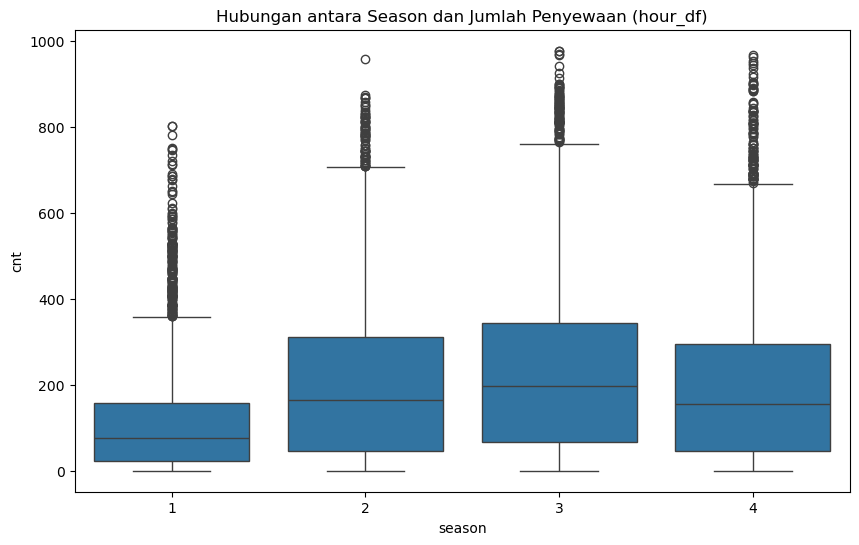

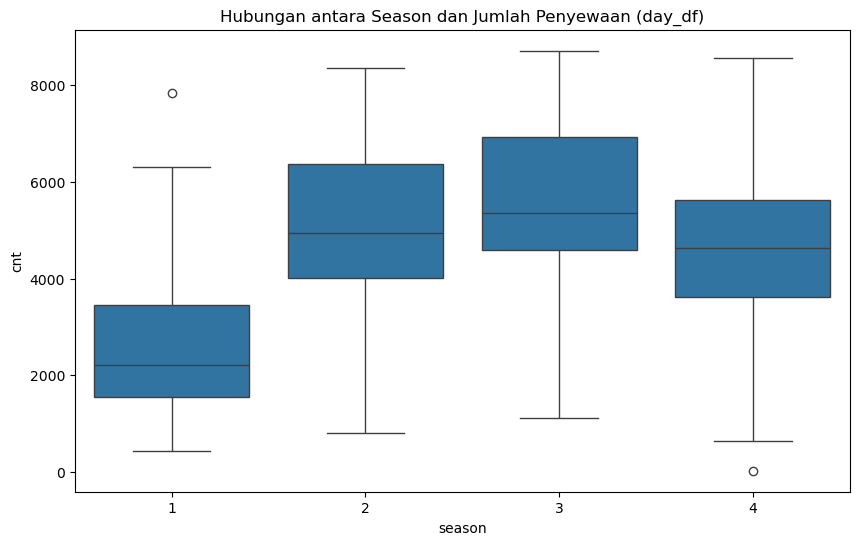

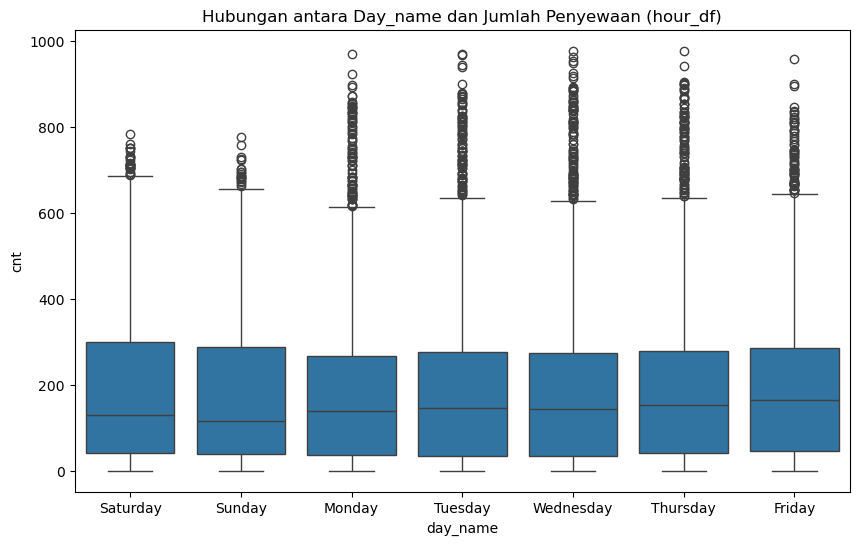

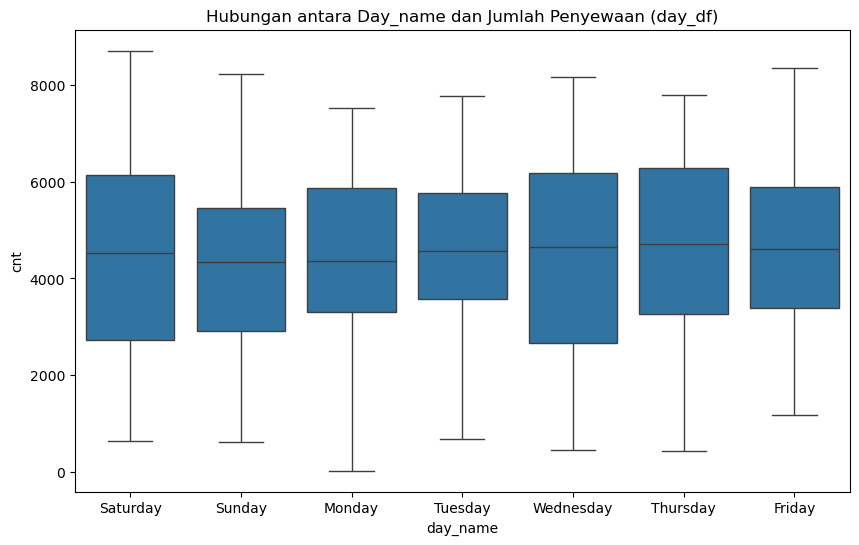

In [1326]:
# Hubungan antara season dan cnt di hour_df
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=hour_df)
plt.title('Hubungan antara Season dan Jumlah Penyewaan (hour_df)')
plt.show()

# Hubungan antara season dan cnt di day_df
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Hubungan antara Season dan Jumlah Penyewaan (day_df)')
plt.show()

# Hubungan antara day_name dan cnt di hour_df
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_name', y='cnt', data=hour_df)
plt.title('Hubungan antara Day_name dan Jumlah Penyewaan (hour_df)')
plt.show()

# Hubungan antara day_name dan cnt di day_df
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_name', y='cnt', data=day_df)
plt.title('Hubungan antara Day_name dan Jumlah Penyewaan (day_df)')
plt.show()

- Tren Waktu

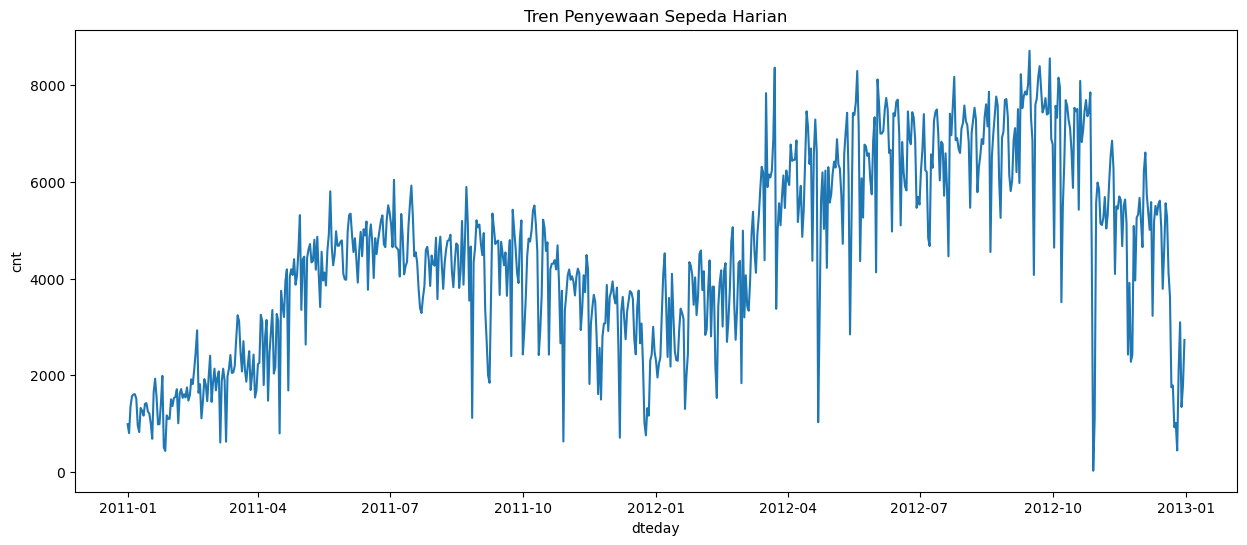

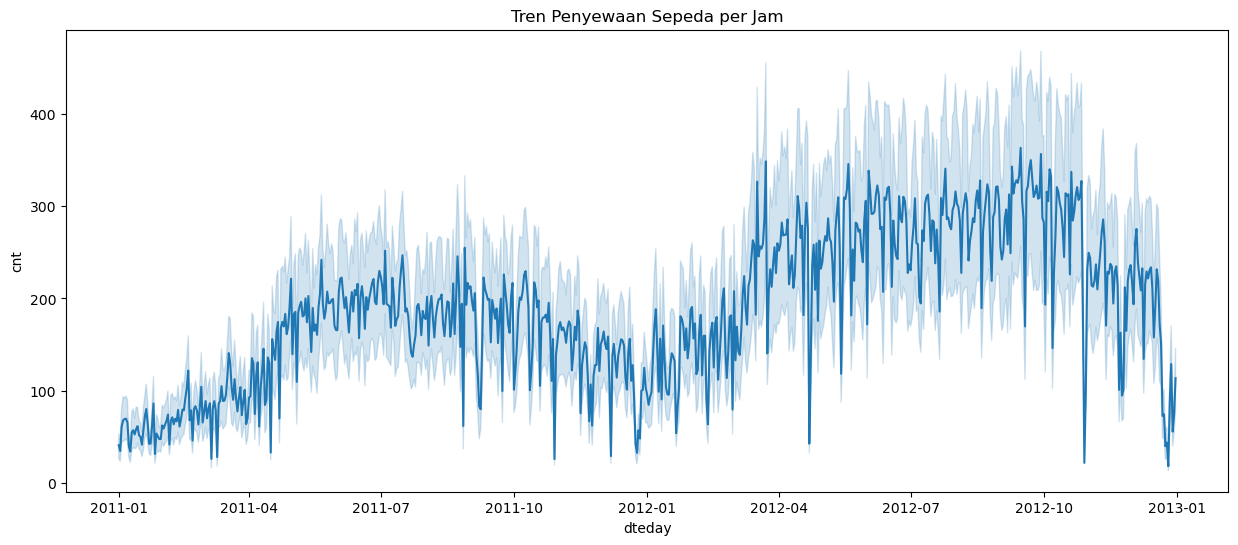

In [1328]:
# Tren penyewaan sepeda harian di day_df
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='cnt', data=day_df)
plt.title('Tren Penyewaan Sepeda Harian')
plt.show()

# Tren penyewaan sepeda per jam di hour_df
plt.figure(figsize=(15, 6))
sns.lineplot(x='dteday', y='cnt', data=hour_df)
plt.title('Tren Penyewaan Sepeda per Jam')
plt.show()

**Insight :**
- Korelasi menunjukkan bahwa suhu (temp dan atemp) memiliki hubungan positif dengan jumlah penyewaan (cnt), sedangkan kelembaban tinggi (hum) dan kecepatan angin (windspeed) cenderung berdampak negatif.
- Pola musiman terlihat jelas dengan penyewaan lebih tinggi di musim tertentu, serta tren harian dan per jam mengindikasikan adanya jam sibuk dan variasi berdasarkan hari dalam seminggu.

#### Eksplorasi Multivariat

- Pengaruh Cuaca dan Musim terhadap Penyewaan

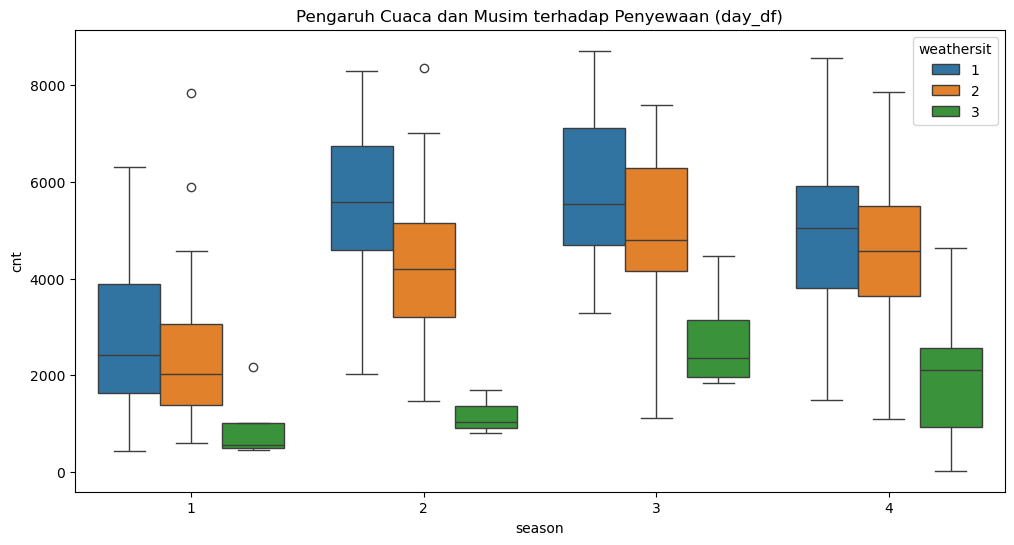

In [1332]:
# Pengaruh weathersit dan season terhadap cnt di day_df
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='cnt', hue='weathersit', data=day_df)
plt.title('Pengaruh Cuaca dan Musim terhadap Penyewaan (day_df)')
plt.show()

**Insight :**
- Penyewaan sepeda cenderung lebih tinggi pada musim tertentu, terutama saat cuaca cerah atau berawan ringan, sementara kondisi cuaca buruk (hujan atau salju) mengurangi jumlah penyewaan secara signifikan di semua musim. 

- Pengaruh Jam dan Hari dalam Seminggu terhadap Penyewaan

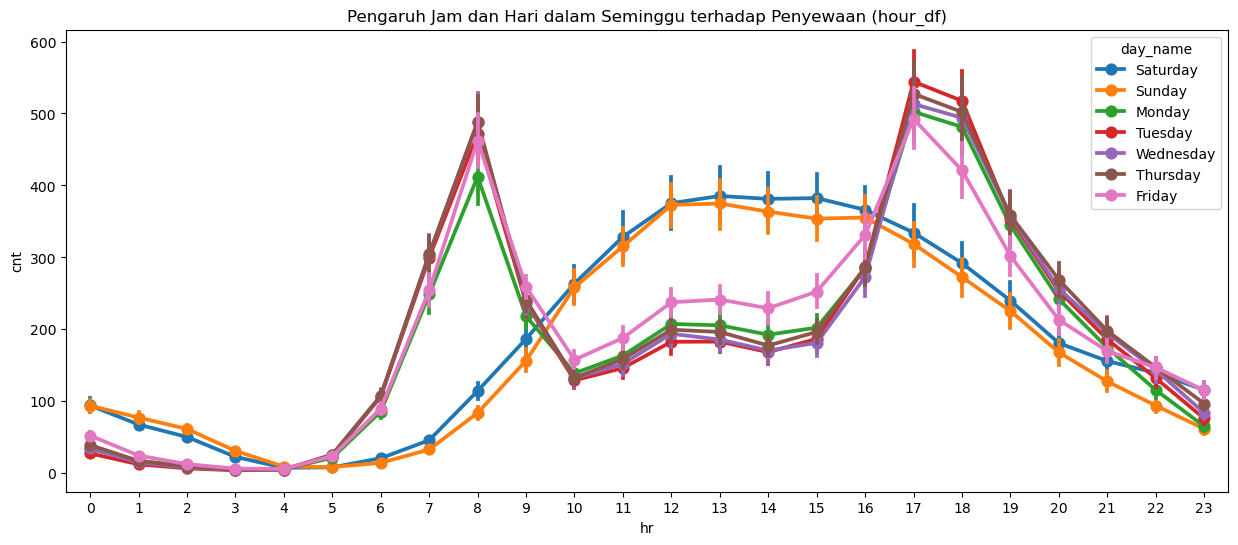

In [1335]:
# Pengaruh jam dan day_name terhadap cnt di hour_df
plt.figure(figsize=(15, 6))
sns.pointplot(x='hr', y='cnt', hue='day_name', data=hour_df)
plt.title('Pengaruh Jam dan Hari dalam Seminggu terhadap Penyewaan (hour_df)')
plt.show()

**Insight :**
- Penyewaan sepeda menunjukkan pola jam sibuk yang jelas, dengan lonjakan pada pagi (sekitar jam 7-9) dan sore (jam 17-19), terutama pada hari kerja, yang kemungkinan besar mencerminkan mobilitas pekerja, sementara akhir pekan cenderung memiliki pola lebih stabil tanpa lonjakan signifikan.

**Menggabungkan dataset untuk eksplorasi lebih lanjut**

In [1338]:
all_df = pd.concat([hour_df, day_df], ignore_index=True)

**Insight :**
- Dengan menggabungkan data, kita bisa menggali lebih dalam dan memahami konteks yang lebih luas, sehingga mendapatkan pemahaman yang lebih kaya tentang bagaimana orang meminjam sepeda.

In [1340]:
# Menyimpan hasil ke CSV di direktori dashboard/
all_df.to_csv("dashboard/all_data.csv", index=False)
print("File all_data.csv berhasil disimpan di dashboard/!")

File all_data.csv berhasil disimpan di dashboard/!


**Insight:**
- Dataset yang telah digabungkan kini lebih adaptif dan siap untuk mendukung berbagai jenis analisis dan pengambilan keputusan yang diperlukan..

### Visualization & Explanatory Analysis

#### 1. Bagaimana pola penggunaan sepeda sewaan per jam dalam sehari?

- Visualisasi

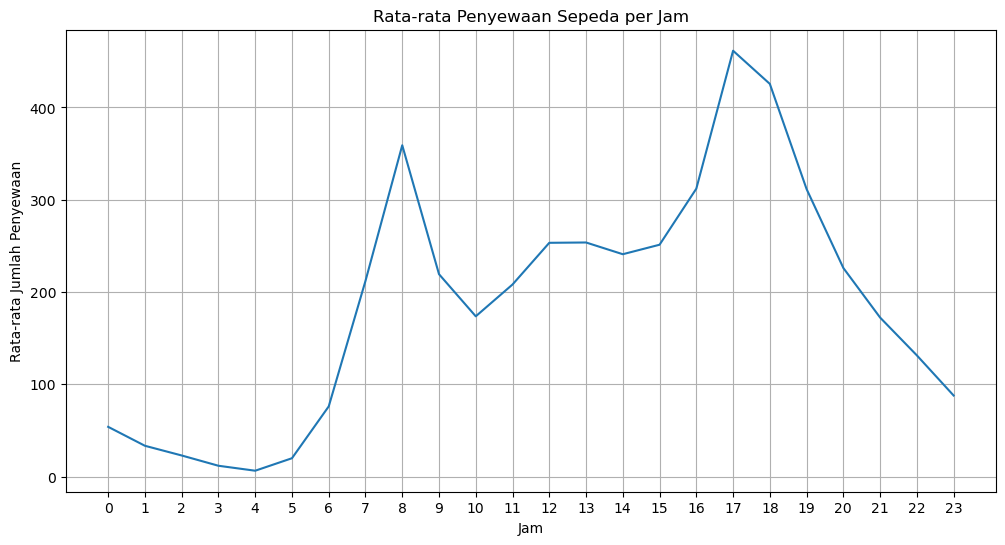

In [1345]:
# Rata-rata penyewaan sepeda per jam
hourly_avg = hour_df.groupby('hr', observed=True)['cnt'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(24))
plt.grid(True)
plt.show()

##### Penjelasan
- Visualisasi ini menunjukkan pola penggunaan sepeda yang jelas sepanjang hari. Puncak penggunaan terjadi pada jam-jam sibuk kerja (pagi dan sore), yang mengindikasikan bahwa banyak orang menggunakan sepeda untuk pergi dan pulang kerja.
- Penggunaan terendah terjadi pada dini hari.

#### 2. Bagaimana tren penggunaan sepeda sewaan dari hari ke hari?

- Visualisasi

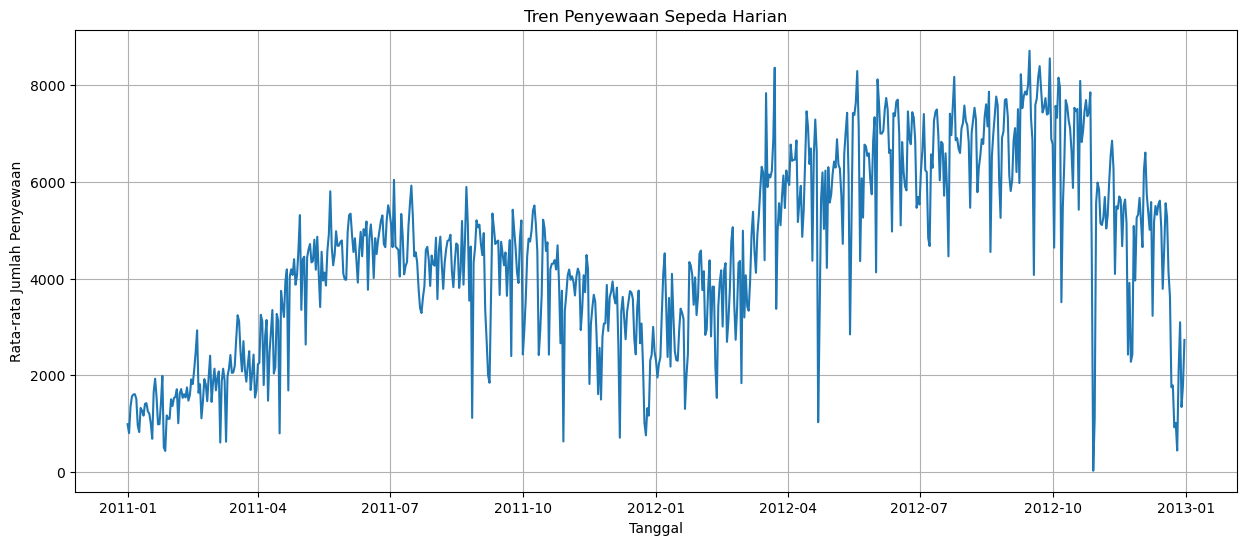

In [1349]:
# Tren penyewaan sepeda harian
daily_avg = day_df.groupby('dteday')['cnt'].mean()

plt.figure(figsize=(15, 6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title('Tren Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.grid(True)
plt.show()

#### Penjelasan
- Visualisasi ini menunjukkan tren penyewaan sepeda dari waktu ke waktu. Ada fluktuasi musiman yang jelas, dengan puncak penggunaan terjadi pada musim panas dan gugur.
- Terlihat adanya tren peningkatan dari tahun ke tahun.

#### 3. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

- Visualisasi

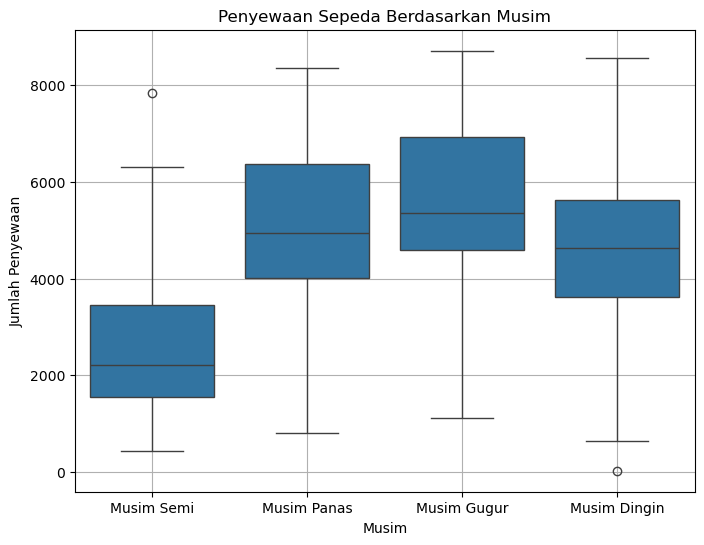

In [1353]:
# Penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.grid(True)
plt.show()

#### Penjelasan
- Musim gugur memiliki jumlah penyewaan sepeda tertinggi, diikuti oleh musim panas. Musim dingin memiliki jumlah penyewaan terendah.
- Hal ini menunjukkan bahwa cuaca yang lebih hangat dan kondisi yang nyaman mendorong lebih banyak orang untuk menggunakan sepeda.

#### 4. Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

- Visualisasi

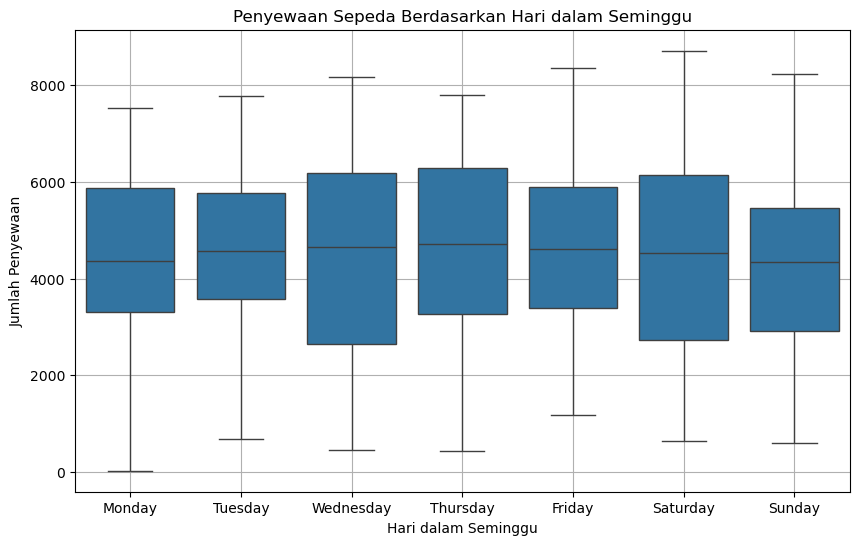

In [1357]:
# Penyewaan sepeda berdasarkan hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_name', y='cnt', data=day_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

#### Penjelasan
- Akhir pekan (Sabtu dan Minggu) memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari kerja.
- Hal ini menunjukkan bahwa orang lebih banyak menggunakan sepeda untuk rekreasi pada akhir pekan.

#### 5. Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?

- Visualisasi

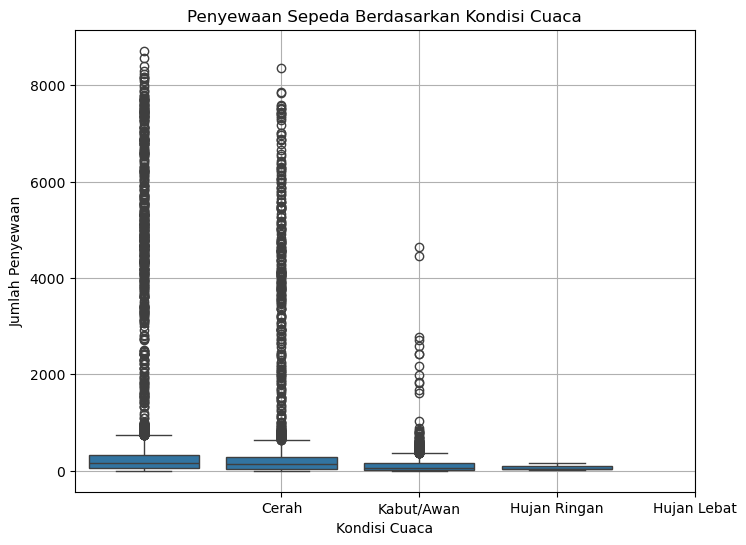

In [1361]:
# Penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='cnt', data=all_df)
plt.title('Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Cerah', 'Kabut/Awan', 'Hujan Ringan', 'Hujan Lebat'])
plt.grid(True)
plt.show()

#### Penjelasan
- Kondisi cuaca cerah memiliki jumlah penyewaan tertinggi, sedangkan kondisi cuaca hujan lebat memiliki jumlah penyewaan terendah.
- Hal ini menunjukkan bahwa kondisi cuaca yang baik sangat penting untuk mendorong penggunaan sepeda.

#### 6. Pada bulan apa saja terjadi puncak dan penurunan signifikan dalam penyewaan sepeda?

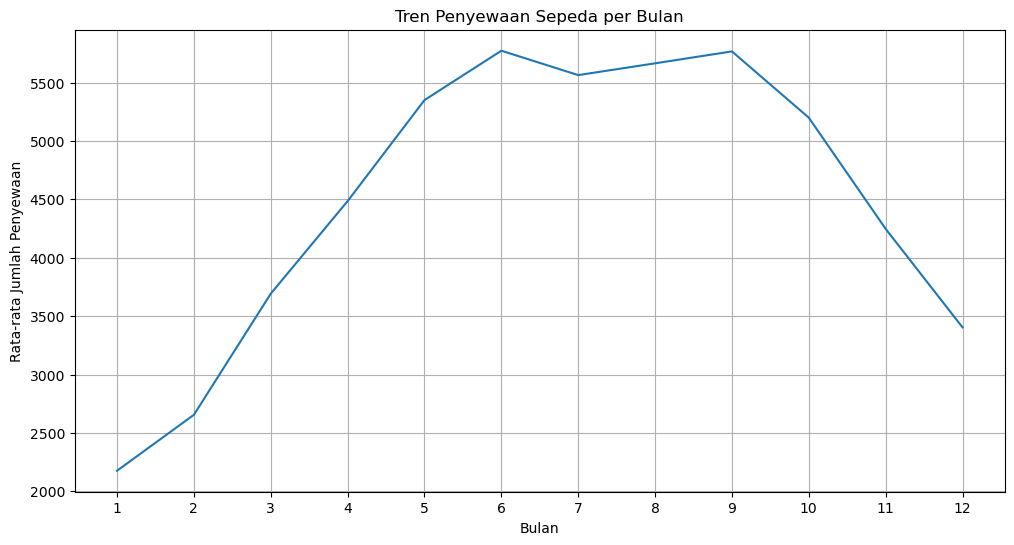

In [1364]:
# Tren penyewaan sepeda per bulan
monthly_avg = day_df.groupby('mnth', observed=True)['cnt'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Tren Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

#### Penjelasan:
- Visualisasi ini memberikan gambaran yang lebih detail tentang tren musiman. Kita dapat melihat bahwa puncak penggunaan terjadi pada bulan-bulan musim panas dan awal musim gugur (Juni hingga Oktober).
- Ada penurunan yang signifikan pada bulan-bulan musim dingin (Desember hingga Februari).

#### 7. Bagaimana hubungan antara suhu, kelembaban, dan jumlah penyewaan sepeda?

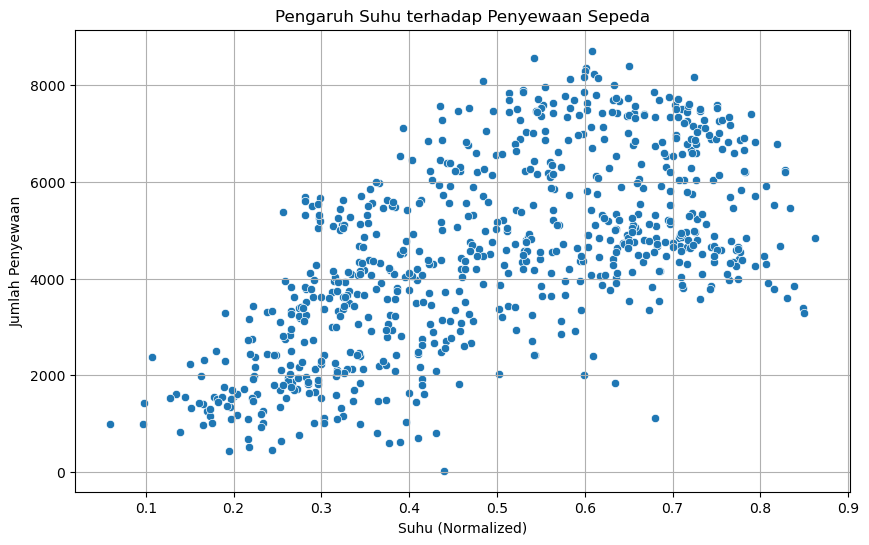

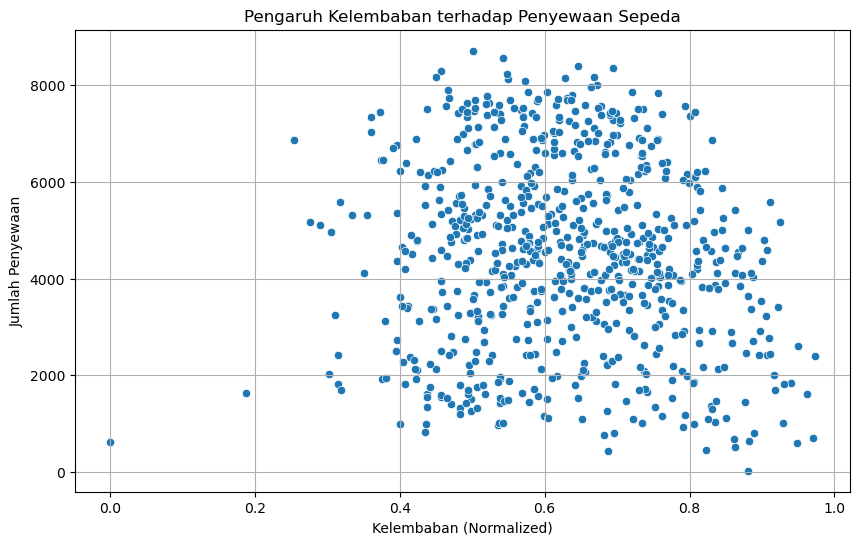

In [1367]:
# Pengaruh suhu terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

# Pengaruh kelembaban terhadap penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df)
plt.title('Pengaruh Kelembaban terhadap Penyewaan Sepeda')
plt.xlabel('Kelembaban (Normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

#### Penjelasan:
- Ada korelasi positif antara suhu dan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak orang yang menggunakan sepeda.
- Ada korelasi negatif antara kelembaban dan jumlah penyewaan sepeda. Semakin tinggi kelembaban, semakin sedikit orang yang menggunakan sepeda.

#### 8. Apakah ada perbedaan pola penggunaan sepeda sewaan antara hari kerja dan akhir pekan per jam?

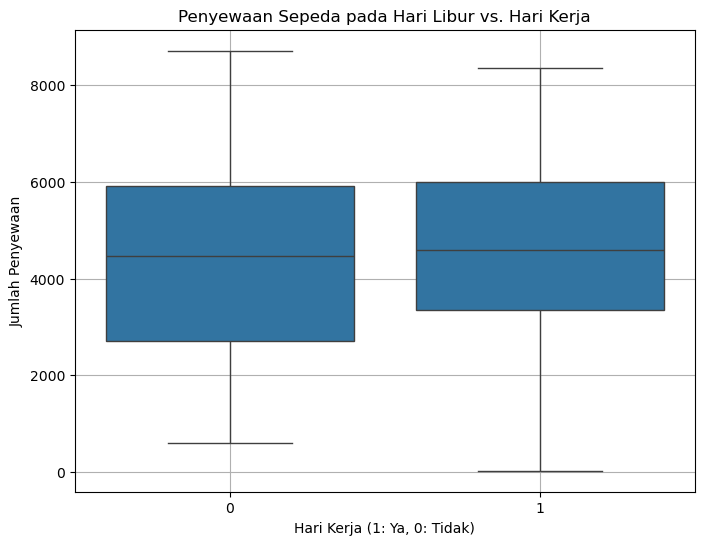

In [1370]:
# Penyewaan sepeda pada hari libur vs. hari kerja
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda pada Hari Libur vs. Hari Kerja')
plt.xlabel('Hari Kerja (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

#### Penjelasan:
- Jumlah penyewaan sepeda cenderung lebih tinggi pada hari libur dibandingkan hari kerja.
- Hal ini menguatkan analisa sebelumnya, bahwa pada hari libur, orang-orang lebih banyak menggunakan sepeda untuk rekreasi.

#### 9. Bagaimana tren penggunaan sepeda berubah dari tahun ke tahun?

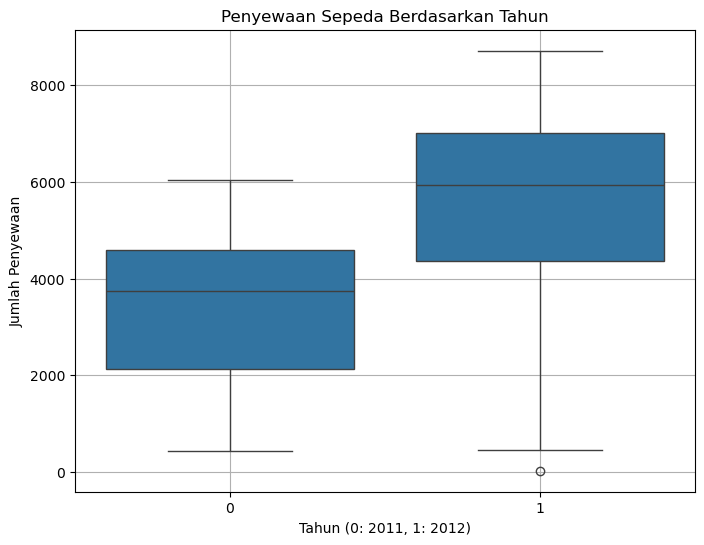

In [1373]:
# Penyewaan sepeda berdasarkan Tahun
plt.figure(figsize=(8, 6))
sns.boxplot(x='yr', y='cnt', data=day_df)
plt.title('Penyewaan Sepeda Berdasarkan Tahun')
plt.xlabel('Tahun (0: 2011, 1: 2012)')
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

#### Penjelasan:
- Terlihat adanya peningkatan jumlah penyewaan sepeda yang signifikan di tahun 2012 dibandingkan tahun 2011.
- Hal ini menandakan adanya peningkatan popularitas dari penyewaan sepeda.

#### 10. Bagaimana perbedaan pola penggunaan sepeda antara penyewa biasa (casual) dan penyewa terdaftar (registered)?

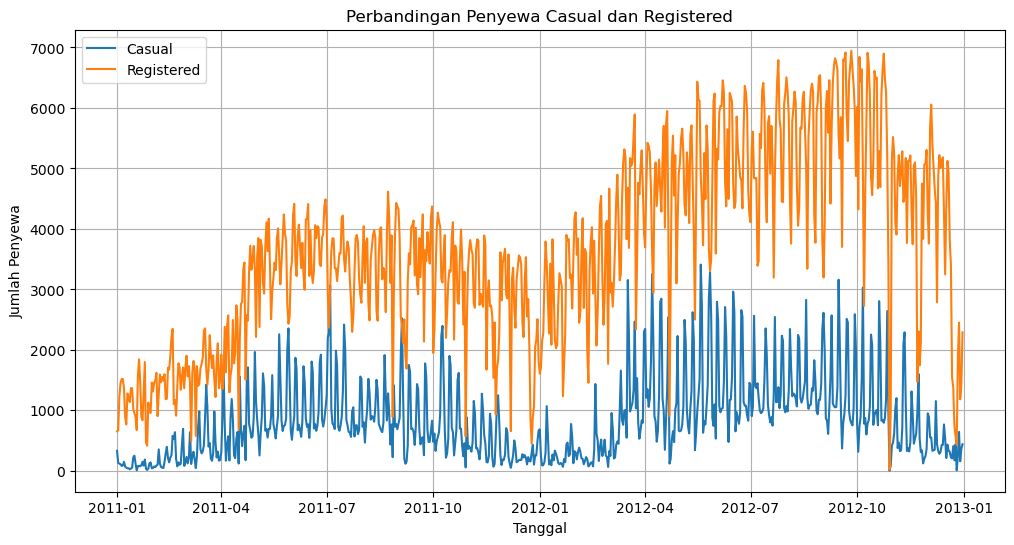

In [1376]:
# Perbandingan penyewa casual dan registered
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='casual', data=day_df, label='Casual')
sns.lineplot(x='dteday', y='registered', data=day_df, label='Registered')
plt.title('Perbandingan Penyewa Casual dan Registered')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewa')
plt.legend()
plt.grid(True)
plt.show()

#### Penjelasan:
- Jumlah penyewa terdaftar (registered) jauh lebih tinggi daripada penyewa biasa (casual).
- Pola penggunaan antara kedua jenis penyewa mirip, tetapi penyewa biasa cenderung lebih banyak menggunakan sepeda pada akhir pekan dan musim panas.

# Analisis Lanjutan

## Clustering

- Dibawah ini adalah clustering menggunakan K-Means untuk menemukan pola dalam data berdasarkan waktu (jam), jumlah penyewaan, hari dalam seminggu, dan kondisi cuaca.
Tujuan dari analisis ini adalah untuk mengelompokkan pola penggunaan sepeda berdasarkan karakteristik waktu dan faktor eksternal, yang dapat berguna untuk optimasi layanan penyewaan sepeda atau perencanaan infrastruktur.

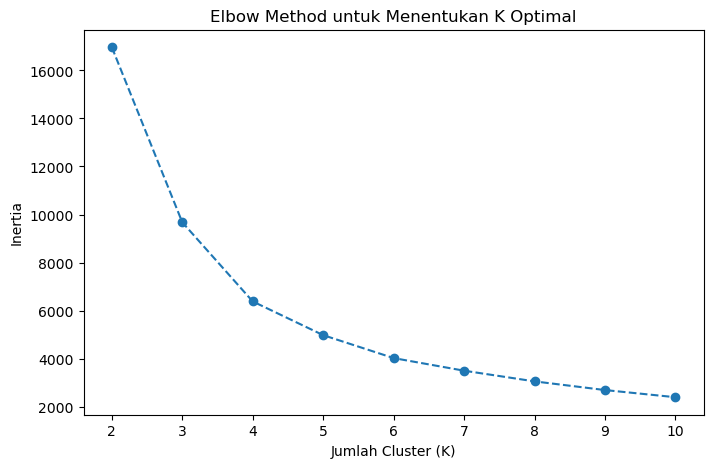

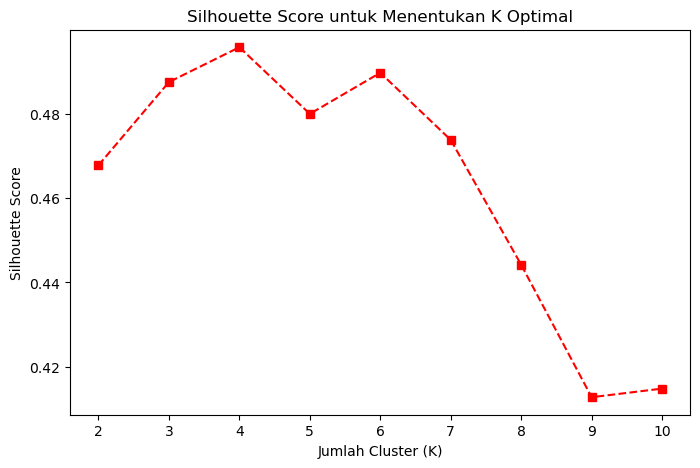

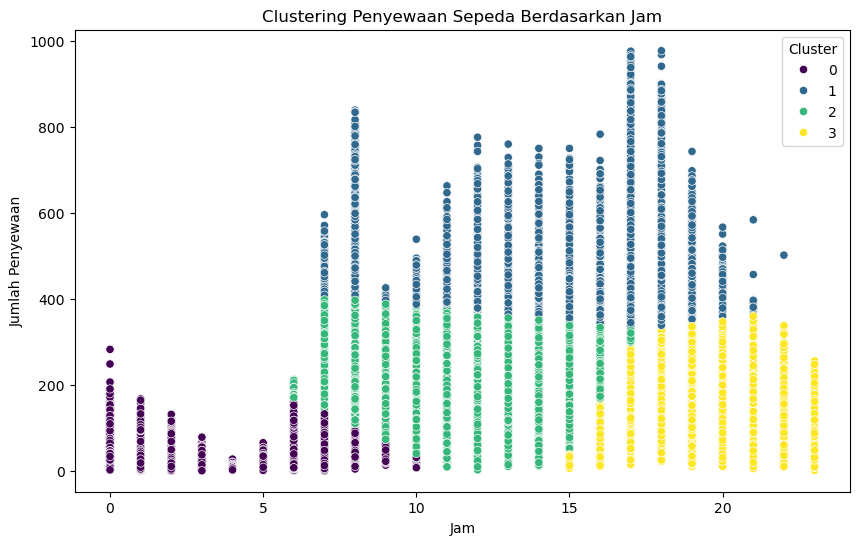

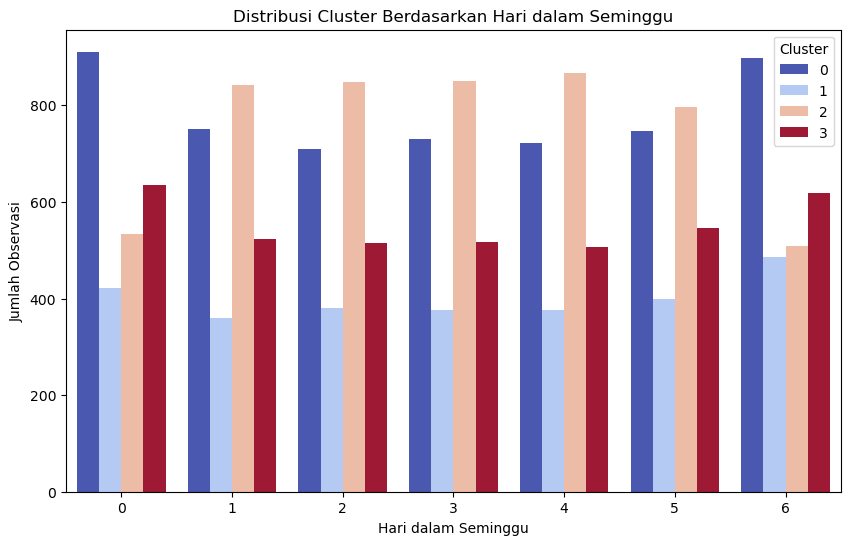

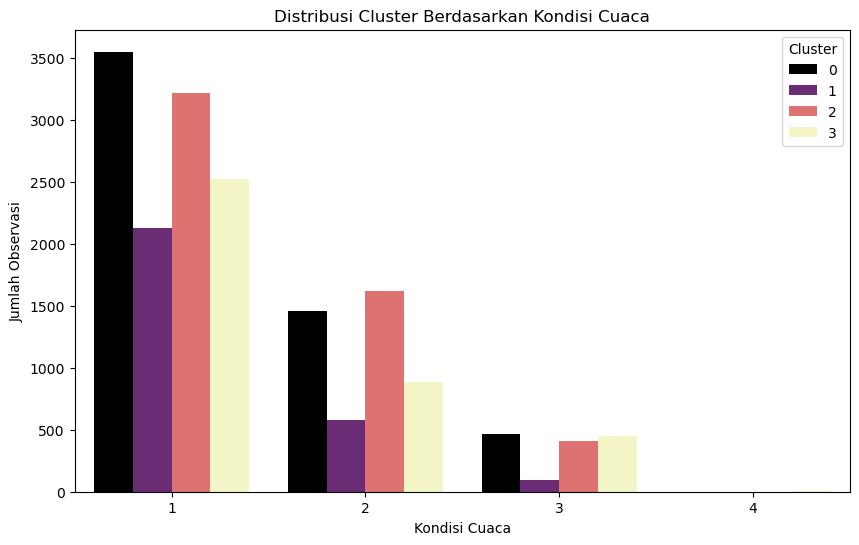

In [1381]:
# Inisialisasi daftar kosong untuk inersia
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    inertia.append(kmeans.inertia_)

# Metode Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan K Optimal')
plt.show()

# Menghitung Silhouette Score
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_cluster_scaled)
    silhouette_scores.append(silhouette_score(df_cluster_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8,5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan K Optimal')
plt.show()

# Menerapkan clustering yang optimal 
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
hour_df['cluster'] = kmeans.fit_predict(df_cluster_scaled)

# Memvisualisasikan hasil clustering
plt.figure(figsize=(10,6))
sns.scatterplot(x=hour_df['hr'], y=hour_df['cnt'], hue=hour_df['cluster'], palette='viridis')
plt.title("Clustering Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title='Cluster')
plt.show()

# Analisis tambahan: distribusi cluster berdasarkan hari kerja
plt.figure(figsize=(10,6))
sns.countplot(x='weekday', hue='cluster', data=hour_df, palette='coolwarm')
plt.title("Distribusi Cluster Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Observasi")
plt.legend(title='Cluster')
plt.show()

# Analisis tambahan: distribusi cluster berdasarkan cuaca
plt.figure(figsize=(10,6))
sns.countplot(x='weathersit', hue='cluster', data=hour_df, palette='magma')
plt.title("Distribusi Cluster Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Observasi")
plt.legend(title='Cluster')
plt.show()

**Insight :**
- Clustering menunjukkan bahwa pola penyewaan sepeda dipengaruhi oleh waktu (dengan lonjakan pada jam sibuk), hari dalam seminggu (lebih tinggi pada akhir pekan untuk rekreasi), dan kondisi cuaca (berkurang saat cuaca buruk), yang mengindikasikan penggunaan utama untuk komuter di hari kerja dan rekreasi di akhir pekan.

# Conclusion (Kesimpulan)

1. Bagaimana pola penggunaan sepeda sewaan per jam dalam sehari? (Conclusion No.1)

- Puncak penggunaan terjadi pada jam-jam sibuk kerja (pagi dan sore), menunjukkan penggunaan komuter yang signifikan.
- Penggunaan terendah terjadi pada dini hari.
- Pola ini konsisten antara hari kerja dan akhir pekan, meskipun volume keseluruhan berbeda.

2. Bagaimana tren penggunaan sepeda sewaan dari hari ke hari? (Conclusion No.2)

- Ada tren peningkatan penggunaan dari tahun ke tahun.
- Fluktuasi musiman yang jelas, dengan puncak penggunaan pada musim panas dan gugur.
- Tren harian menunjukkan pola yang konsisten dengan pola per jam, tetapi dengan variasi yang lebih besar.

3. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda? (Conclusion No.3)

- Musim gugur memiliki jumlah penyewaan tertinggi, diikuti oleh musim panas.
- Musim dingin memiliki jumlah penyewaan terendah.
- Cuaca yang lebih hangat dan kondisi yang nyaman mendorong lebih banyak orang untuk menggunakan sepeda.

4. Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan? (Conclusion No.4)

- Akhir pekan (Sabtu dan Minggu) memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari kerja.
- Orang lebih banyak menggunakan sepeda untuk rekreasi pada akhir pekan.

5. Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda? (Conclusion No.5)

- Kondisi cuaca cerah memiliki jumlah penyewaan tertinggi.
- Kondisi cuaca hujan lebat memiliki jumlah penyewaan terendah.
- Kondisi cuaca yang baik sangat penting untuk mendorong penggunaan sepeda.

6. Pada bulan apa saja terjadi puncak dan penurunan signifikan dalam penyewaan sepeda? (Conclusion No.6)

- Puncak penggunaan terjadi pada bulan-bulan musim panas dan awal musim gugur (Juni hingga Oktober).
- Penurunan signifikan pada bulan-bulan musim dingin (Desember hingga Februari).

7. Bagaimana hubungan antara suhu, kelembaban, dan jumlah penyewaan sepeda? (Conclusion No.7)

- Ada korelasi positif antara suhu dan jumlah penyewaan sepeda.
- Ada korelasi negatif antara kelembaban dan jumlah penyewaan sepeda.

8. Bagaimana perbedaan jumlah penyewaan sepeda antara hari kerja dan hari libur? (Conclusion No.8)

- Jumlah penyewaan sepeda cenderung lebih tinggi pada hari libur dibandingkan hari kerja.
- Orang lebih banyak menggunakan sepeda untuk rekreasi pada hari libur.

9. Bagaimana tren penggunaan sepeda berubah dari tahun ke tahun? (Conclusion No.9)

- Peningkatan jumlah penyewaan sepeda yang signifikan di tahun 2012 dibandingkan tahun 2011.
- Popularitas penyewaan sepeda meningkat dari tahun ke tahun.

10. Bagaimana perbedaan pola penggunaan sepeda antara penyewa biasa (casual) dan penyewa terdaftar (registered)? (Conclusion No.10)

- Jumlah penyewa terdaftar (registered) jauh lebih tinggi daripada penyewa biasa (casual).
- Pola penggunaan antara kedua jenis penyewa mirip, tetapi penyewa biasa cenderung lebih banyak menggunakan sepeda pada akhir pekan dan musim panas.